In [190]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

In [330]:
df = pd.DataFrame()

locations = ['local', 'remote']
types = ['attack', 'control']

In [318]:
def get_clean_data(folder, name):
    input_df = pd.read_csv(f'{folder}/{name}.csv', header=None)

    before_len = len(input_df)
    
    print("Cleaning " + name + ".csv (" + str(before_len) + " rows)")
    
    input_df = input_df[(input_df[1] == 302) & (input_df[2] == 302)]
    print(str(before_len - len(input_df)) + " rows with unexpected http codes")

    before_len = len(input_df)
    input_df = input_df[(np.abs(stats.zscore(input_df[0])) < 2)]
    print(str(before_len - len(input_df)) + " rows with outliers")
    
    return input_df[0]

# NOTE no outlier removal etc - here we are trying to see how effective the most naive implemetantion would be. 
# I.e. how likely it is that an attack is accurate given a small sample of salvos (i.e. 5 pairs as the entire attack).  
def show_overall_result(folder, name):
    input_df = pd.read_csv(f'{folder}/{name}.csv', header=None)
    total_qty = len(input_df)
    suspect_email_exists_qty = len(input_df[input_df[0] == 0])

    pct = (suspect_email_exists_qty / total_qty) * 100
    
    print(f'{suspect_email_exists_qty} of {total_qty} ({pct}%) results indicate a user exists with the given email')

def analyse_result_folder(folder):
    for type in types:
        for location in locations:
            print(f'\n{folder} {location} {type}') 
            
            name = f'{location}_{type}_detail'
            
            df[name] = get_clean_data(folder, name)

            name = f'{location}_{type}_winners'
            
            show_overall_result(folder, name)
    
    df.plot(kind='kde', figsize=(15,5), color=['red', 'olivedrab', 'goldenrod', 'mediumseagreen'])

In [319]:
# While the above kde chart is useful for improving our mental model of how the attack works, all a real attacker really needs to know is 
# whether responses typically arrived at about the same time. 
# Our analysis suggests that only one batch of 5 pairs is required, even in the remote (over the internet) context

# Suprised that the spread is wider for local vs. remote. Perhaps something to do with virtualisation, or some other detail of the specific
# deployment of the contrived target app. What's cool about this attack though, is that we don't care about that kind of detail at all! 
# All we care about is "did the response pairs arrive back at about the same time?". 

# As you would expect, remote probes take longer in general, vs. local


# What is most interesting in these results is how obvious the difference between control and attack is. 
# This suggests that any single indicator in the attack data of the target user existing is probably good enough
# Itis very likely that the first salvo will be enough, and if not, only 2 or 3 should be required nuder most circumstances. 


results_wifi local attack
Cleaning local_attack_detail.csv (574 rows)
0 rows with unexpected http codes
9 rows with outliers
70 of 115 (60.86956521739131%) results indicate a user exists with the given email

results_wifi remote attack
Cleaning remote_attack_detail.csv (575 rows)
0 rows with unexpected http codes
22 rows with outliers
83 of 115 (72.17391304347827%) results indicate a user exists with the given email

results_wifi local control
Cleaning local_control_detail.csv (490 rows)
0 rows with unexpected http codes
11 rows with outliers
0 of 98 (0.0%) results indicate a user exists with the given email

results_wifi remote control
Cleaning remote_control_detail.csv (495 rows)
0 rows with unexpected http codes
22 rows with outliers
0 of 99 (0.0%) results indicate a user exists with the given email


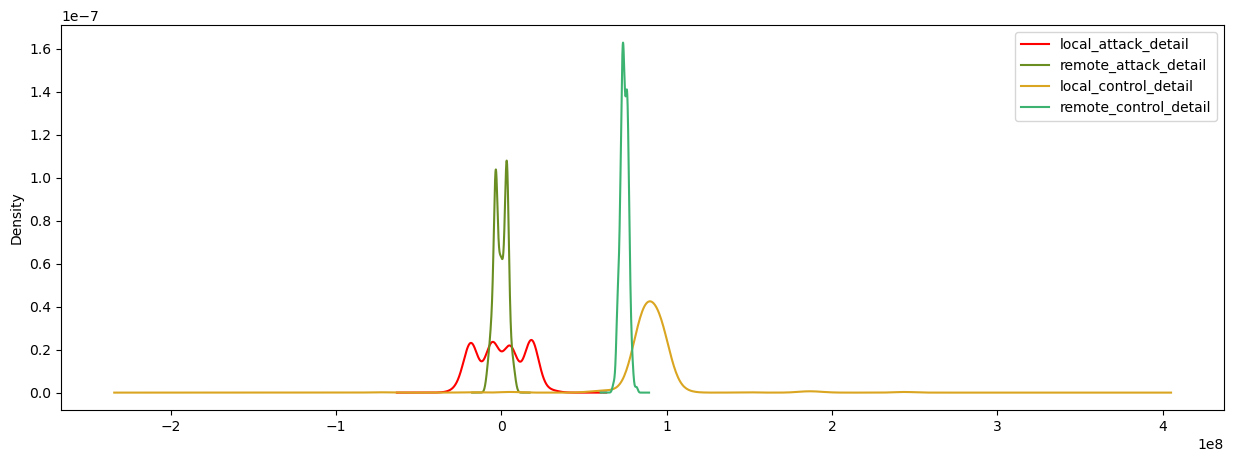

In [332]:
analyse_result_folder("results_wifi")


results_wired local attack
Cleaning local_attack_detail.csv (490 rows)
0 rows with unexpected http codes
11 rows with outliers
64 of 98 (65.3061224489796%) results indicate a user exists with the given email

results_wired remote attack
Cleaning remote_attack_detail.csv (490 rows)
0 rows with unexpected http codes
19 rows with outliers
63 of 98 (64.28571428571429%) results indicate a user exists with the given email

results_wired local control
Cleaning local_control_detail.csv (485 rows)
0 rows with unexpected http codes
4 rows with outliers
0 of 97 (0.0%) results indicate a user exists with the given email

results_wired remote control
Cleaning remote_control_detail.csv (505 rows)
0 rows with unexpected http codes
22 rows with outliers
0 of 101 (0.0%) results indicate a user exists with the given email


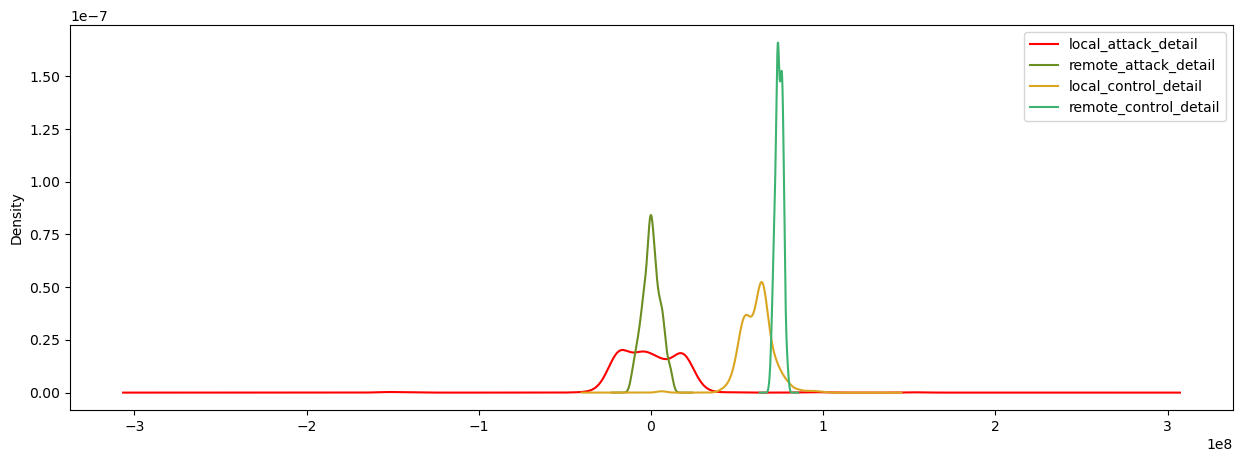

In [331]:
analyse_result_folder("results_wired")